# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

In [1]:
import numpy as np

def derifw(y,x,dx):
    return (y(x+dx)-y(x))/dx

def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx

def deried(y,x,dx):
    return (4*dericd(y,x,dx/2)-dericd(y,x,dx))/3

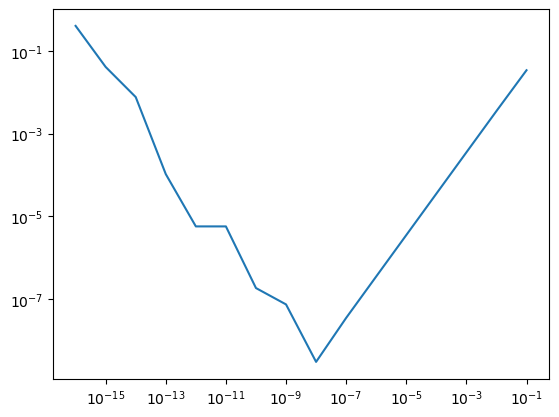

In [2]:
import matplotlib.pyplot as plt

# 1
x = np.pi/4
dx = np.logspace(-16,-1, 16)
fwerr_arr = []

for _dx in dx:
    ans = derifw(np.cos, x, _dx)
    fwerr_arr.append(abs(ans + np.sin(x)))

plt.loglog(dx, fwerr_arr);

In above, Error ~ dx^n where n ~ 1 as dx decreases from 0.1 to 1.e-8.
The optimal value of dx here is 1.e-8.
Beyond 1.e-8, truncation error causes accuracy to suffer.

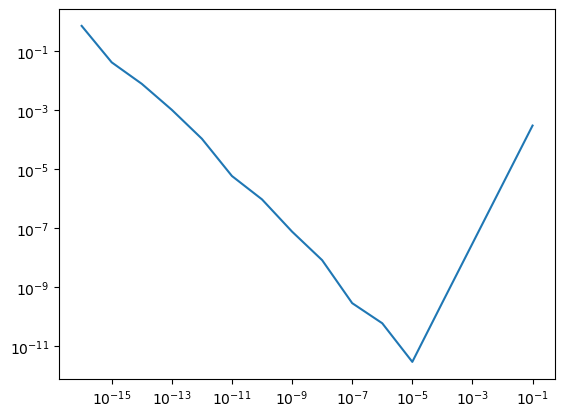

In [3]:
# 2

cderr_arr = []

for _dx in dx:
    ans = dericd(np.cos, x, _dx)
    cderr_arr.append(abs(ans + np.sin(x)))
    
plt.loglog(dx, cderr_arr);

Central difference scheme is better than forward difference scheme because it is accurate to second-order.
This results in a smaller truncation error with a larger optimum dx ~ 1.e-5.

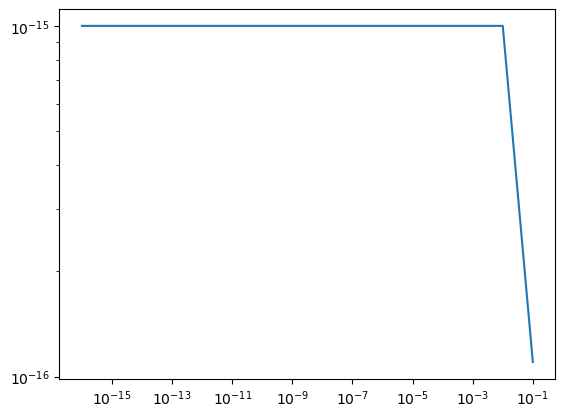

In [4]:
# 3

cderr_arr2 = []
x = 1e-15

for _dx in dx:
    ans = dericd(np.cos, x, _dx)
    cderr_arr2.append(abs(ans + np.sin(x)))
    
plt.loglog(dx, cderr_arr2);

Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

The error term for central difference scheme is aproximated by 
    f_analytic'(x) - f_numerical'(x) ~ (h^2/3)f_analytic'''(x) + ...
Given the above expresion, where f(x) = cos(x), f'''(x) = sin(x).
For x = 0, sin(x) = 0.
Thus, error estimation is very quickly overcome by machine precision ~ 1e-16.